# Exercise II: Random walk
Karthik Jayadevan (Matriculation Number: 5582876)

03.11.2023


In this exercise, numerical calculations are done to show how a Gaussian distribution emerges from a random walk, and how the distribution's first three moments depend on the number of both steps and independent walks.

Starting, as usual, with the import statements:

In [1]:
# The usual libraries:
import numpy as np
import matplotlib.pyplot as plt

# To import the custom plotting style
import sys
sys.path.append('..')
plt.style.use('../ccs_ex.mplstyle')

# from ccs_basis import *
# The above import statement is commented out because it is never used in this code.

# The package 'pandas' is briefly used to convert the random walk array to a dataframe and display it in an organized way.
import pandas as pd
from IPython.display import display

# To measure the execution time:
import time

# Importing some pre-defined functions for some statistical measures:
from scipy.stats import norm, skew
from scipy import  stats

# HTML module to display some tables more nicely:
from IPython.display import HTML

## Task 1: Implementation

In [2]:
def move(x):
    '''
    Draws a random number from a uniform distribution and adds 1 to x, if not adds -1 to x.
    Input: x
    Output: x after one step
    '''

    r = np.random.uniform(0,1) # random number between 0 and 1 taken from a uniform distribution

    if r>=0.5:
        x+=1
    else:
        x-=1
    
    # Note to self; is there a difference between the above method and using the np.choice([-1,1])?

    return x


Text(0.5, 1.0, 'Random walk in one dimension of 50 steps')

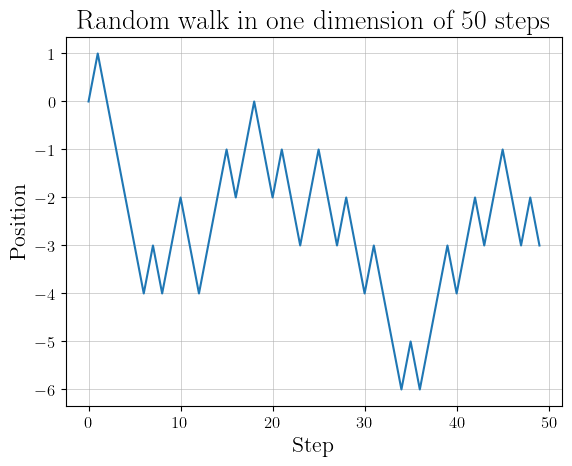

In [3]:
def random_walk(num_steps=50,x=0):
    '''
    Performs a random walk of `num_steps` number of steps (set to 50 if no number is specified).
    The walk starts at x=0, which can also be modified using a keyword argument.

    Input: Number of steps, initial position
    Returns: An array of the trajectory of the random walk.
    '''

    walk_array = np.zeros(num_steps) # empty array

    for i in range(num_steps):
        walk_array[i] = x # adds the current position
        x = move(x) # moves one step
    
    return walk_array

num_steps = 50
rw50 = random_walk(num_steps)

plt.plot(rw50)
plt.xlabel(r'Step')
plt.ylabel(r'Position')
plt.title(f'Random walk in one dimension of {num_steps} steps')


### Printing out the random walk

In [4]:
# We convert the trajectory array to a dataframe to organize the output and display it.
df = pd.DataFrame({'Position': rw50}, index=list(range(num_steps)))
df.index.name = 'Step'
display(df)

,Position
Step,
0,0.0
1,1.0
2,0.0
3,-1.0
4,-2.0
5,-3.0
6,-4.0
7,-3.0
8,-4.0


## Task II: Simulation and Evaluation

Tasks to be done:

- Run $n = 10000$ random walks of $N = 20000$ steps each (that should only take ca. 2 minutes calculation time).
- Plot histograms of the distribution of x for all n = 10000 random walks for $N = 100, 1000, 10000$ and $20000$.
- For $N = 100, 1000, 10000$ and $20000$, check the convergence of all walks check in dependence of n for
 - the first moment, i.e. the mean $\langle x \rangle$,
 - the second moment, i.e. the variance $\langle(x − \langle x\rangle)^2 \rangle$ and
 - the third moment, giving the skewness $\langle(x − \langle x \rangle )^3\rangle$ .

First, I start by defining the function `many_walks` to create arrays for multiple random walks of equal steps. The `all_walks` array has the shape `[num_walks,steps]`. Each row is one iteration of a random walk of `num_steps` steps.

Execution time: 0.08 seconds


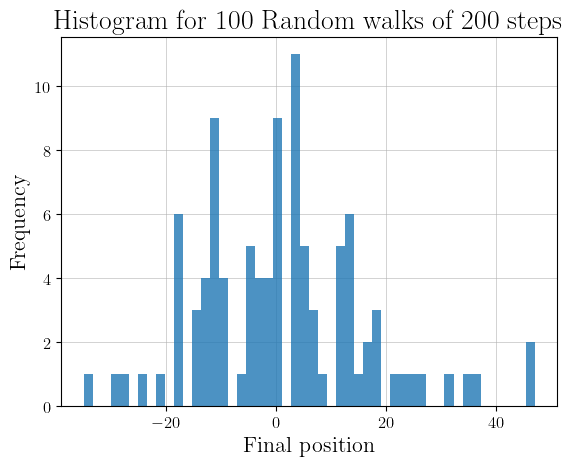

In [5]:
def many_walks(num_walks,num_steps,num_bins=50, timing = False):
    '''
    Input: Number of random walks to be done, number of steps, number of bins (50 by default)
    and an option to measure the code execution time.
    
    Outputs: An array containing the final positions after each random walk and the plot figure object.
    '''

    if timing: # start measuring time if the timing arg is enabled
        start_time = time.time()

    # empty array to store all the random  walk steps
    all_walks = np.zeros((num_walks,num_steps))

    # empty array to store the final positions after each random walk
    final_positions = np.zeros(num_walks)

    for i in range(num_walks):
        all_walks[i,:] = random_walk(num_steps) # fill each row with one random walk, involking the `random_walk` function
        final_positions[i] = all_walks[i,-1] # store the final position after each walk
    
    #plotting histogram:
    fig,ax = plt.subplots()
    ax.hist(final_positions,num_bins,zorder=2,alpha=0.8)
    ax.set_xlabel('Final position')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Histogram for {num_walks} Random walks of {num_steps} steps')

    if timing: 
        end_time = time.time() # stop measuring time
        print(f'Execution time: {round(end_time-start_time,2)} seconds') # print the execution duration of this function

    return final_positions,fig

many_walks(100,200,timing=True);

For $n=10000$ random walks of $N=20000$ steps each, we try using the same function and also measure the execution time, since it is mentioned in the question that the solution code should only take about 2 minutes to execute.

Execution time: 225.78 seconds


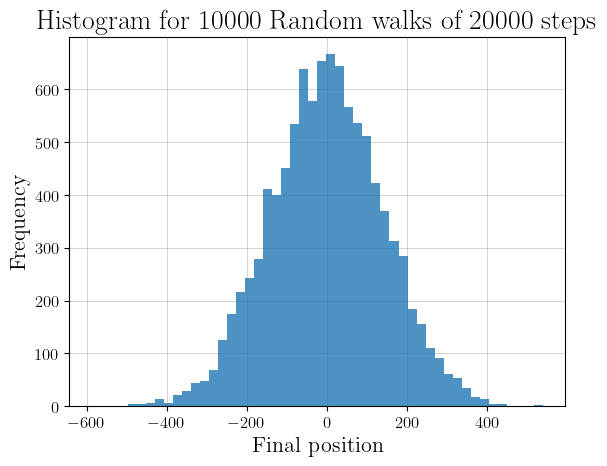

In [6]:
many_walks(10000,20000,timing=True);

The above code takes close to 4 minutes to run. As the exercise specifies that the code should take only ca. 2 minutes to execute, I try a different approach; start by defining an array of size `num_steps` which has random values between 0 and 1. From this, I use the numpy `where` function to define a new array `moves` which has $1$ at the indices where $r\geq 0.5$ and $-1$ where $r < 0.5$.

In [12]:
def random_walk_v2(num_steps,x0=0):
    '''
    A new version of a random walk function, which takes in the number of steps as input, and the initial position as an optional input.
    ''' 
    
    # an array of random values between 0 and 1
    r = np.random.uniform(0, 1, num_steps)

    # a new array of the same size as `r`, but values 1 and -1 according to the conditions that r>=0.5 and r<0.5 respectively.
    moves = np.where(r>=0.5, x0+1, x0-1)
    
    # The final position is the sum of the moves;
    return np.sum(moves)

random_walk_v2(20)

-2

In [13]:
def many_walks_v2(num_walks,num_steps,timing = False, bins=100, x0=0):
    '''
    Mostly identical as the `many_walks` function with the only difference that this function uses the `random_walk_v2` function
    instead of `random_walk` for each walk.
    '''
    
    if timing:
        start_time = time.time()

    final_positions = np.zeros(num_walks)

    for i in range(num_walks):
        final_positions[i] = random_walk_v2(num_steps,x0=x0) # uses the new random walk code

    if timing:
        end_time = time.time()
        print(f'Execution time: {round(end_time-start_time,2)} seconds')

    return final_positions

Now I check if the execution time has any difference:

Execution time: 1.76 seconds


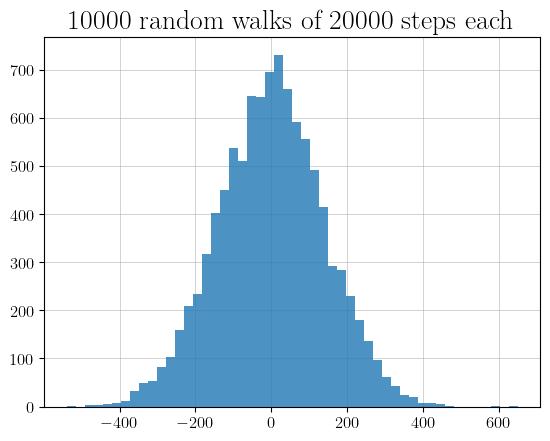

In [14]:
dist = many_walks_v2(10000,20000,timing=True)

plt.hist(dist,50,zorder=2,alpha=0.8);
plt.title('10000 random walks of 20000 steps each');

The execution time has been reduced to less than 2 seconds! (Too good to be correct?)

Now I define a function to fit the obtained distributions to a Gaussian. Since this is not a task directly asked in the question, I use ChatGPT to create the function.

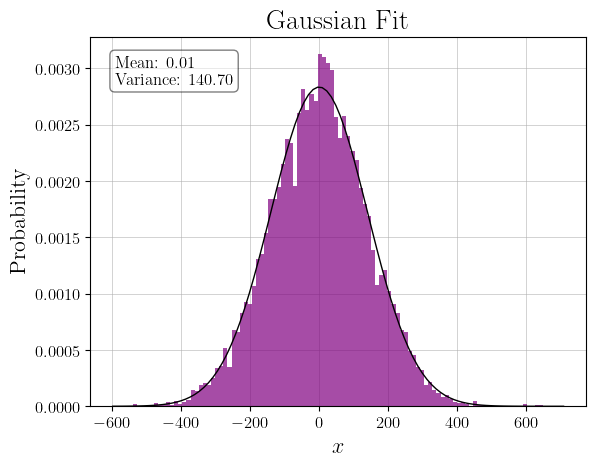

In [15]:
def fit_gaussian(data,num_bins=50):
    """
    Plots a histogram of the input data and fits a Gaussian distribution to the histogram.
    
    Parameters:
    - data: array-like, the data to plot and fit
    
    Returns:
    None
    """
    
    # Plot a histogram of the values
    plt.hist(data, bins=num_bins, density=True, alpha=0.7, color='purple',zorder=2)
    
    # Calculate the mean and standard deviation of the data
    mu, std = norm.fit(data)
    
    # Plot the PDF of the fitted Gaussian.
    xmin, xmax = plt.xlim() # getting the minimum and maximum x values from the histogram
    x = np.linspace(xmin, xmax, 100) # array of x
    p = norm.pdf(x, mu, std) # array of the distribution function p(x)
    plt.plot(x, p, 'k', linewidth=1)
    
    # Print the fit parameters on the graph
    plt.text(0.05, 0.95, f'Mean: {mu:.2f}\nVariance: {std:.2f}', transform=plt.gca().transAxes,
             fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
    
    # Add title and labels to the histogram
    plt.title('Gaussian Fit')
    plt.xlabel(r'$x$')
    plt.ylabel('Probability')
    
    # Show the plot
    plt.show()

fit_gaussian(dist,num_bins=100)

Now the task is to plot  histograms of the distribution of x for all $n = 10000$ random walks for $N = 100, 1000, 10000$ and $20000$.

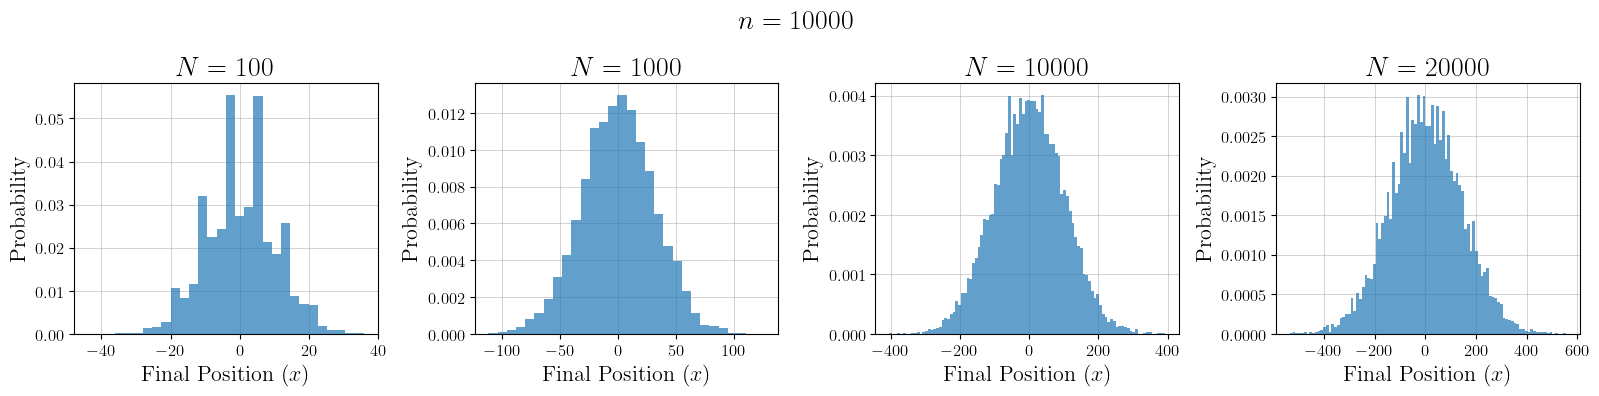

In [18]:
# Values of n (walks) and N (steps) to consider
n_values = [10000] # passing as a list so that more can be added if needed
N_values = [100, 1000, 10000, 20000] # given in the question

# Create subplots
fig, axes = plt.subplots(1, len(N_values), figsize=(16, 4))  # here: subplot array 1x4 for each plot

# Loop through different values of n and N to create histograms
for i, N in enumerate(N_values):
    for j, n in enumerate(n_values):
        
        # an adjustment for the bins
        if N >= 10000:
            num_bins = 100
        elif N < 10000:
            num_bins = 30
            
        ax = axes[i]  # subplot object for current N value
        data = many_walks_v2(n, N)  # Generate distributions for current N,n
        
        #plot histogram:
        ax.hist(data, bins=num_bins, density=True,zorder=2,alpha=0.7)
        ax.set_title(fr'$N =$ {N}')
        ax.set_xlabel(r'Final Position ($x$)')
        ax.set_ylabel('Probability')

fig.suptitle(r'$n=10000$')
plt.tight_layout()


Now I improve the above `fit_gaussian` function to incorporate subplot objects `ax` generated like above.

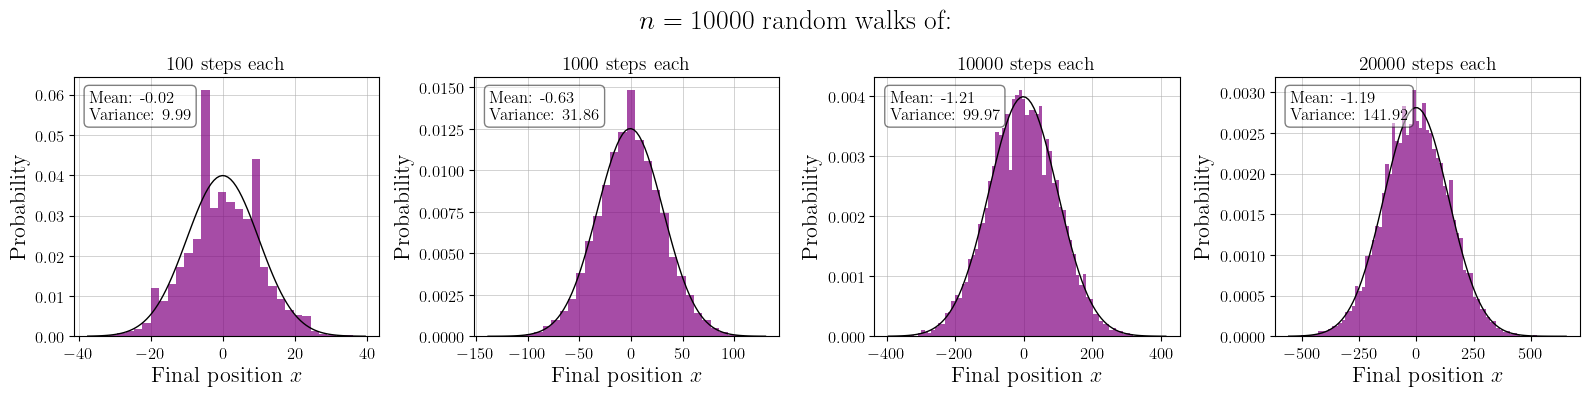

In [19]:
def fit_gaussian(data, ax, num_bins=50):
    """
    Plots a histogram of the input data and fits a Gaussian distribution to the histogram.
    
    Parameters:
    - data: array-like, the data to plot and fit
    - num_bins: the number of bins for the histogram
    - ax: the matplotlib axes to plot on
    
    Returns:
    None
    """
    
    # Plot a histogram of the values
    ax.hist(data, bins=num_bins, density=True, alpha=0.7, color='purple', zorder=2)
    
    # Calculate the mean and standard deviation of the data
    mu, std = norm.fit(data)
    
    # Plot the PDF of the fitted Gaussian.
    xmin, xmax = ax.get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    ax.plot(x, p, 'k', linewidth=1)
    
    # Print the fit parameters on the graph
    ax.text(0.05, 0.95, f'Mean: {mu:.2f}\nVariance: {std:.2f}', transform=ax.transAxes,
             fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
    
    # Add title and labels to the histogram
    ax.set_title('Gaussian Fit')
    ax.set_xlabel(r'Final position $x$')
    ax.set_ylabel('Probability')

# Values of n (walks) and N (steps) to consider
n_values = [10000]
N_values = [100, 1000, 10000, 20000]

# Create subplots
fig, axes = plt.subplots(1, len(N_values), figsize=(16, 4))  # Adjusted layout for single row

# Loop through different values of n and N to create histograms and fit Gaussians
for i, N in enumerate(N_values):
    for j, n in enumerate(n_values):
        if N >= 10000:
            num_bins = 75
        elif N < 10000:
            num_bins = 30
        ax = axes[i]  # Adjusted indexing for single row
        data = many_walks_v2(n, N)  # Generate the final positions
        fit_gaussian(data, num_bins=num_bins, ax=ax)  # Fit Gaussian and plot
        ax.set_title(fr'${N}$ steps each',fontsize=14)

fig.suptitle(fr'$n={n}$ random walks of:')

plt.tight_layout()
plt.show()


The final task is to check the convergence  of all walks by calculating the three moments of the distributions obtained. For the calculation of moments, I use standard functions available from the numpy and scipy packages.

- The first moment about zero gives us the mean of the distribution. For a Gaussian distribution, this is the central peak where the curve is symmetrically distributed around. So we expect the mean to be zero.

- The second moment about the mean gives us the variance. In a Gaussian distribution, this measures the spread or width of the bell curve, which means this cannot be zero.

- The third moment about the mean gives us skewness, which measures the asymmetry of the distribution. For a Gaussian distribution, skewness should be zero because the distribution is symmetrical.

I use the pandas dataframe object to display the statistics measures in a tabular form:

In [22]:
def calculate_moments(N, n_values):
    results = [] # empty list to store the moments values
    
    for n in n_values:
        data = many_walks_v2(n, N) # random walks iteration
        
        # Calculate mean
        mean = np.mean(data)
        
        # Calculate variance
        variance = np.var(data)
        
        # Calculate skewness
        skewness = stats.skew(data)
        
        results.append({
            'n': n,
            'Mean': round(mean,2),
            'Variance': round(variance,2),
            'Skewness': round(skewness,2)
        }) # result stored as adictionary object
        
    return pd.DataFrame(results) # make the result into a dataframe

# Initialize the range of n_values and N_values
n_values = [10, 50, 100, 500, 1000, 5000, 10000] # considering many n values to check for any dependence
N_values = [100, 1000, 10000, 20000] # retaining the same N values as the previous task

# to store multiple DataFrames for different N values
dfs = {}

#calculate moments and create a DataFrame for each N
for N in N_values:
    dfs[N] = calculate_moments(N, n_values)

# to display the DataFrames
for N, df in dfs.items():
    print(f"N = {N}")
    # display(HTML(df.to_html(index=False)))
    display(df)



N = 100


,n,Mean,Variance,Skewness
0,10,1.00,18.60,-0.36
1,50,-1.12,69.47,0.09
2,100,0.34,78.24,0.07
3,500,-0.52,89.13,-0.07
4,1000,0.24,99.74,0.06
5,5000,-0.18,103.01,-0.00
6,10000,-0.07,98.75,0.02


N = 1000


,n,Mean,Variance,Skewness
0,10,-5.20,933.76,-0.46
1,50,-0.80,1184.96,-0.06
2,100,-4.78,975.67,0.08
3,500,0.64,990.39,0.08
4,1000,-0.27,934.98,-0.06
5,5000,-0.01,1033.97,0.01
6,10000,0.31,1018.74,-0.05


N = 10000


,n,Mean,Variance,Skewness
0,10,7.60,9717.44,-0.00
1,50,-6.04,10228.24,-0.25
2,100,11.26,9543.81,-0.07
3,500,1.87,10137.09,-0.06
4,1000,4.00,10071.02,0.11
5,5000,-0.70,9809.84,-0.03
6,10000,1.62,10054.66,0.02


N = 20000


,n,Mean,Variance,Skewness
0,10,21.60,31315.84,0.40
1,50,-18.60,19722.76,0.21
2,100,21.36,15321.75,-0.13
3,500,-3.20,18587.06,0.08
4,1000,8.72,18475.42,-0.05
5,5000,-0.52,19502.00,-0.02
6,10000,2.11,20259.09,0.02


We see that with larger $N$ values, the mean gets closer to zero. The variance always increases with $n$ and the skewness is always near zero, as expected.

The question asks to check the dependence of $n$ for all three moments. An evident trend is observed only for ths second moment with increasing $n$. The variance increases with increasing number of random walks $n$ for a fixed number of steps $N$.

One remark I make at this point is that for each task, I am running the `many_walks` function from the start. As a result, for each task, I generate different datasets. I'm not sure if this is actually an issue since no comparisons are done between the different stages/tasks. 

A better way to do this would have been by storing each iterations of the random walks (N,n) as separate arrays (or dataframes?) so that the random walk need not be generated each time for every task. Due to limited time, I am unable to implement this solution now. 

## Task III

The written solution to the third task is appended from the next page.